In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\geral\anaconda3\envs\advpython\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("austinHousingData.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,garageSpaces,hasAssociation,hasCooling,...,latest_salemonth,latest_saleyear,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,2,True,True,...,9,2019,6011.0,2601,1.266667,2.666667,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,2,True,True,...,10,2020,6185.0,1768,1.400000,2.666667,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,0,True,True,...,7,2019,7840.0,1478,1.200000,3.000000,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,2,True,True,...,8,2018,6098.0,1678,1.400000,2.666667,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,0,True,True,...,10,2018,6708.0,2132,1.133333,4.000000,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


# Select your features (columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15171 entries, 0 to 15170
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zpid               15171 non-null  int64  
 1   city               15171 non-null  object 
 2   streetAddress      15171 non-null  object 
 3   zipcode            15171 non-null  int64  
 4   description        15171 non-null  object 
 5   latitude           15171 non-null  float64
 6   longitude          15171 non-null  float64
 7   garageSpaces       15171 non-null  int64  
 8   hasAssociation     15171 non-null  bool   
 9   hasCooling         15171 non-null  bool   
 10  hasView            15171 non-null  bool   
 11  homeType           15171 non-null  object 
 12  yearBuilt          15171 non-null  int64  
 13  latestPrice        15171 non-null  int64  
 14  latest_salemonth   15171 non-null  int64  
 15  latest_saleyear    15171 non-null  int64  
 16  lotSizeSqFt        151

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['latest_saleyear','yearBuilt','garageSpaces', 'lotSizeSqFt',
                        'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
                        'avgSchoolRating','avgSchoolDistance', 'latestPrice', 'latest_salemonth']]

selected_features.head()

,latest_saleyear,yearBuilt,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,avgSchoolRating,avgSchoolDistance,latestPrice,latest_salemonth
0,2019,2012,2,6011.0,2601,3.0,4,2,2.666667,1.266667,305000,9
1,2020,2013,2,6185.0,1768,2.0,4,1,2.666667,1.400000,295000,10
2,2019,2018,0,7840.0,1478,2.0,3,1,3.000000,1.200000,256125,7
3,2018,2013,2,6098.0,1678,2.0,3,1,2.666667,1.400000,240000,8
4,2018,2002,0,6708.0,2132,3.0,3,2,4.000000,1.133333,239900,10


In [7]:
selected_features2 = df[['numOfBathrooms', 'livingAreaSqFt']]

selected_features2.head()

,numOfBathrooms,livingAreaSqFt
0,3.0,2601
1,2.0,1768
2,2.0,1478
3,2.0,1678
4,3.0,2132


In [8]:
# train, test, split
X = selected_features2
y = df['latestPrice'].values.reshape(-1, 1)
print(X.shape, y.shape)

(15171, 2) (15171, 1)


In [9]:
# split the data to train and test values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X_train.head()

,numOfBathrooms,livingAreaSqFt
1145,2.0,1650
8937,2.0,1115
14600,2.0,1361
13509,2.5,2627
733,3.0,3114


# Data Preprocessing

In [11]:
# df['homeType'] = df['homeType'].str.replace(',', '')
# df['homeType'] = df['homeType'].convert_objects(convert_numeric=True)
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Scale your data. Import dependencies.
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
# from tensorflow.keras.utils import to_categorical

# # Scale the data.
# X_scaler = StandardScaler().fit(X_train)
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

# # Label-encoder dataset.
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)


# print(encoded_y_test)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

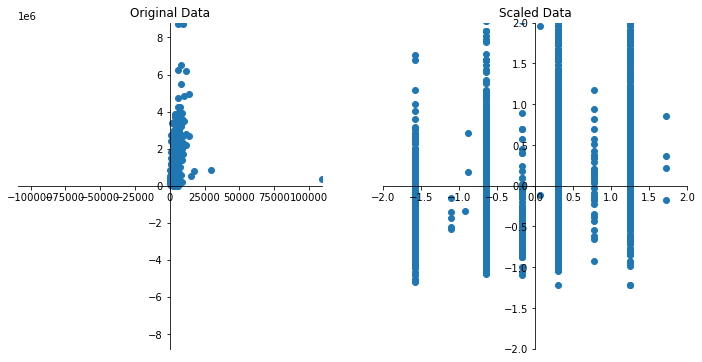

In [13]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["livingAreaSqFt"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["livingAreaSqFt"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [14]:
df.describe()

,zpid,zipcode,latitude,longitude,garageSpaces,yearBuilt,latestPrice,latest_salemonth,latest_saleyear,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.229187,1988.554743,5.127677e+05,6.733043,2019.078241,1.190840e+05,2208.323314,1.838495,5.779912,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,1.352117,21.579458,4.531853e+05,3.146760,0.813941,1.225272e+07,1378.576119,1.068376,1.860276,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,0.000000,1905.000000,5.500000e+03,1.000000,2018.000000,1.000000e+02,300.000000,0.200000,2.333333,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,0.000000,1974.000000,3.090000e+05,4.000000,2018.000000,6.534000e+03,1483.000000,1.100000,4.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.000000,1993.000000,4.050000e+05,7.000000,2019.000000,8.276000e+03,1975.000000,1.566667,5.778694,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,2.000000,2006.000000,5.750000e+05,9.000000,2020.000000,1.089000e+04,2687.000000,2.266667,7.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,22.000000,2020.000000,1.350000e+07,12.000000,2021.000000,1.508483e+09,109292.000000,9.000000,9.500000,27.000000,20.000000,4.000000


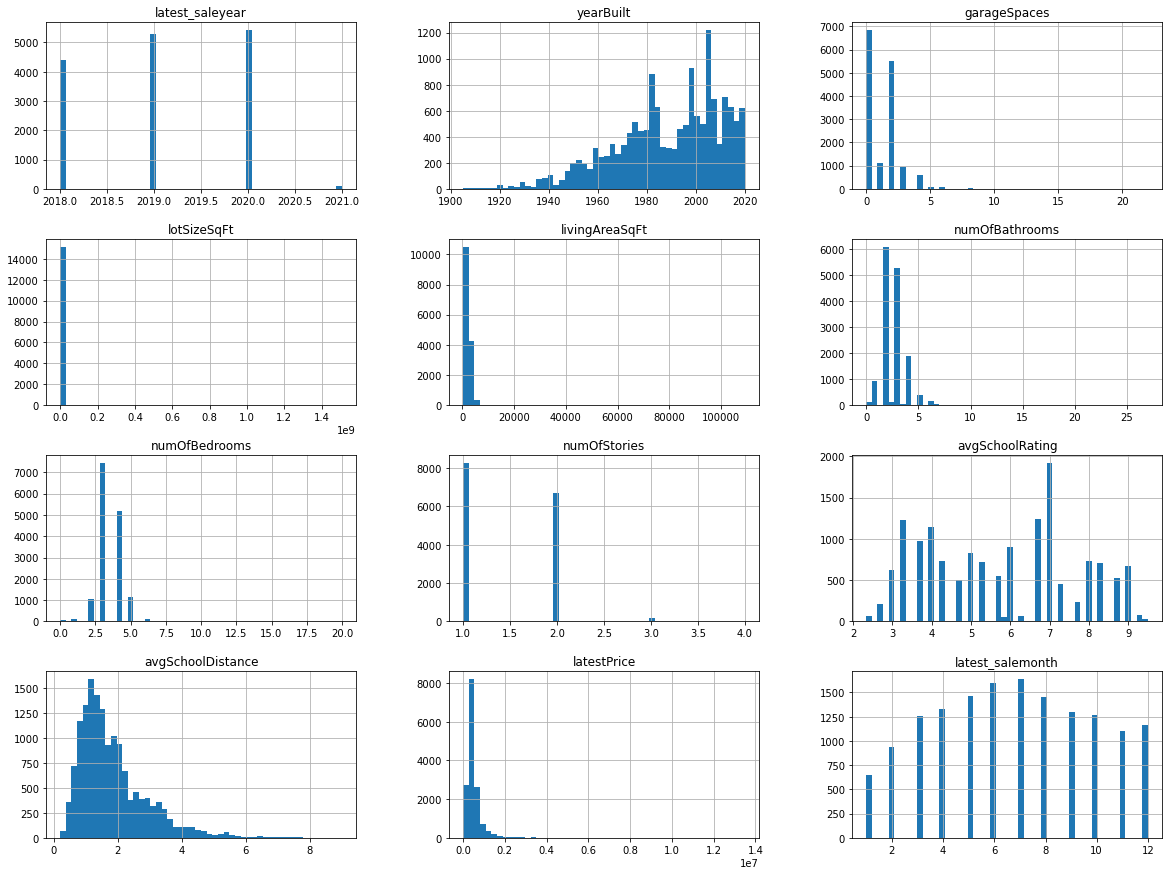

In [15]:
# Charting
selected_features.hist(bins=50, figsize=(20,15))
# plt.savefig("attribute_histogram_plots")
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

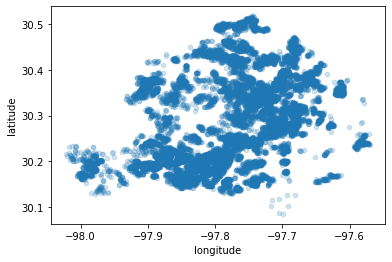

In [16]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

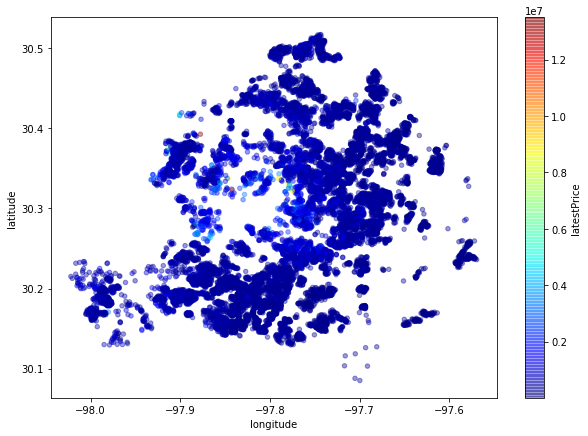

In [17]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="latestPrice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [18]:
#correlation matrix
corr_matrix = df.corr()
corr_matrix["latestPrice"].sort_values(ascending=False)

latestPrice          1.000000
numOfBathrooms       0.504738
livingAreaSqFt       0.467034
numOfBedrooms        0.299839
avgSchoolRating      0.293101
numOfStories         0.200555
garageSpaces         0.157443
hasView              0.133969
avgSchoolDistance    0.094156
latitude             0.071547
latest_saleyear      0.059942
yearBuilt            0.059692
latest_salemonth     0.033898
lotSizeSqFt          0.020940
hasCooling           0.010075
zpid                 0.007503
hasAssociation      -0.005043
zipcode             -0.145946
longitude           -0.184079
Name: latestPrice, dtype: float64

Text(0, 0.5, 'latestPrice')

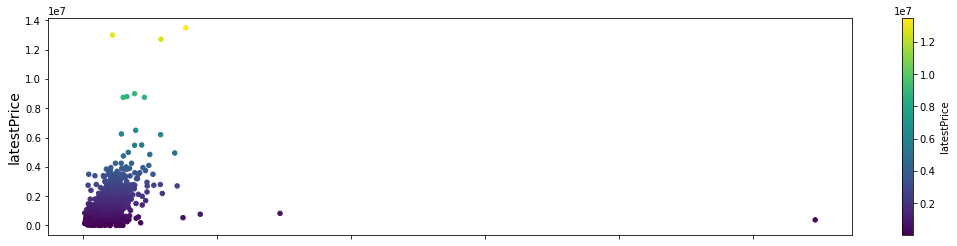

In [19]:
ax1 = df.plot.scatter(x='livingAreaSqFt',y='latestPrice',c='latestPrice', colormap='viridis',figsize=(18,4))
ax1.set_xlabel("livingAreaSqFt", fontsize=14)
ax1.set_ylabel("latestPrice", fontsize=14)

<AxesSubplot:xlabel='livingAreaSqFt', ylabel='latestPrice'>

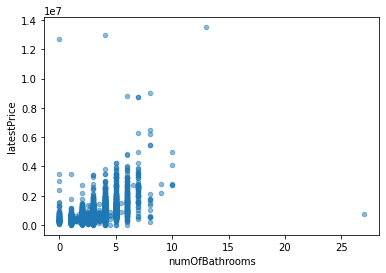

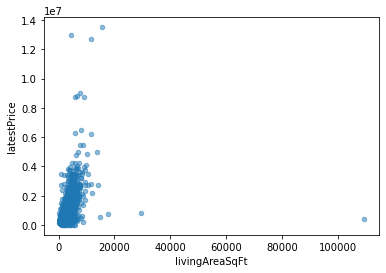

In [20]:
df.plot(kind="scatter", x="numOfBathrooms", y="latestPrice", alpha=0.5)
# plt.savefig('scatter.png')

df.plot(kind="scatter", x="livingAreaSqFt", y="latestPrice", alpha=0.5)
# plt.savefig('scatter.png')

# Create a Train Test Split

In [21]:
# X_train.head()

from sklearn.model_selection import train_test_split

selected_features_train, selected_features_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)

# Create model


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the Model



In [23]:
model.fit(selected_features_train, y_train)
training_score = model.score(selected_features_train, y_train)
testing_score = model.score(selected_features_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


# Plot Residuals

Text(0.5, 1.0, 'Residual Plot')

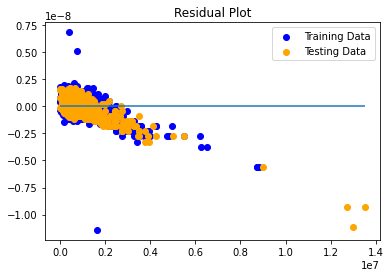

In [24]:
plt.scatter(model.predict(selected_features_train), model.predict(selected_features_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(selected_features_test), model.predict(selected_features_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Save the Model

In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)

NameError: name 'your_model' is not defined